In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

## Question 1

#### a. Take	at	least	100	images	per	class with	at	least	3	classes	using	your	phone/camera	(you can	take	advantage	of	spring	in	Bloomington	and	take	photos	of	different	trees,	 flowers,	animals). Display 5	examples	from	each	class.

We have taken 3 classes: bottle, car, and shoe. We have 100 images for each class. We will be displaying 5 examples from each class.

Class: Bottle | Label: 0


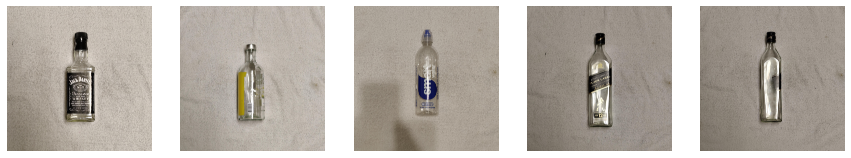

In [33]:
dir_path = r"C:\Users\jsubh\Desktop\AML\Homework4\data\bottle"

file_list = os.listdir(dir_path)
image_list = [file for file in file_list if file.endswith(('jpg'))]

print("Class: Bottle | Label: 0")

fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    if i < len(image_list):
        image_path = os.path.join(dir_path, image_list[i])
        img = plt.imread(image_path)
        axs[i].imshow(img)
        axs[i].axis('off')
plt.show()

Class: Car | Label: 1


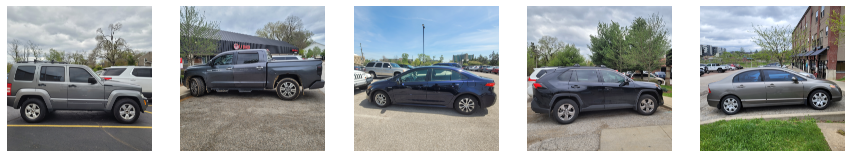

In [32]:
dir_path = r"C:\Users\jsubh\Desktop\AML\Homework4\data\car"

file_list = os.listdir(dir_path)
image_list = [file for file in file_list if file.endswith(('jpg'))]

print("Class: Car | Label: 1")

fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    if i < len(image_list):
        image_path = os.path.join(dir_path, image_list[i])
        img = plt.imread(image_path)
        axs[i].imshow(img)
        axs[i].axis('off')
plt.show()

Class: Shoe | Label: 2


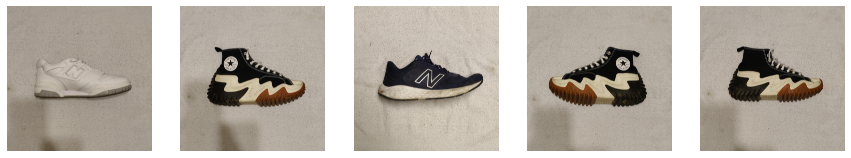

In [31]:
dir_path = r"C:\Users\jsubh\Desktop\AML\Homework4\data\shoe"

file_list = os.listdir(dir_path)
image_list = [file for file in file_list if file.endswith(('jpg'))]

print("Class: Shoe | Label: 2")

fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    if i < len(image_list):
        image_path = os.path.join(dir_path, image_list[i])
        img = plt.imread(image_path)
        axs[i].imshow(img)
        axs[i].axis('off')
plt.show()

#### b. Build	the	input	pipeline,	including	the	appropriate	preprocessing	operations,	and	add	data augmentation.

Data augmentation: It is the technique of adding more data to the existing dataset for better performance and accuracy. It is a pretty common preprocessing step for any kind of image classification. We are flipping each image left to right i.e. horizontal flipping, and then adding them to the same directory of original images. This augments our data and doubles the amount of data we have.

In [32]:
dir_path = r"C:\Users\jsubh\Desktop\AML\Homework4\data\bottle"
file_list = os.listdir(dir_path)
image_list = [file for file in file_list if file.endswith(('jpg'))]

cnt = 101
for image_name in image_list:
    image_path = os.path.join(dir_path, image_name)
    image = Image.open(image_path)
    flipped_image = image.transpose(method=Image.FLIP_LEFT_RIGHT)
    flipped_image.save(os.path.join(dir_path, "bottle_" + str(cnt) + ".jpg"))
    cnt+=1

In [151]:
dir_path = r"C:\Users\jsubh\Desktop\AML\Homework4\data\car"
file_list = os.listdir(dir_path)
image_list = [file for file in file_list if file.endswith(('jpg'))]

cnt = 101
for image_name in image_list:
    image_path = os.path.join(dir_path, image_name)
    image = Image.open(image_path)
    flipped_image = image.transpose(method=Image.FLIP_LEFT_RIGHT)
    flipped_image.save(os.path.join(dir_path, "car_" + str(cnt) + ".jpg"))
    cnt+=1

In [33]:
dir_path = r"C:\Users\jsubh\Desktop\AML\Homework4\data\shoe"
file_list = os.listdir(dir_path)
image_list = [file for file in file_list if file.endswith(('jpg'))]

cnt = 101
for image_name in image_list:
    image_path = os.path.join(dir_path, image_name)
    image = Image.open(image_path)
    flipped_image = image.transpose(method=Image.FLIP_LEFT_RIGHT)
    flipped_image.save(os.path.join(dir_path, "shoe_" + str(cnt) + ".jpg"))
    cnt+=1

Next we perform the following pre-processing steps:

1. Resizing: The images have been taken by all our team members using different phones i.e. not all images are guaranteed to have the same size. Also the images are all in the range of 3000x3000 pixels, which is computationally very expensive. So we resize all the images to 32x32 pixels. We choose 32x32 because this size works the best and also most image classification datasets have 32x32 sized images.
2. Grayscaling: All our images were originally clicked in RGB. But since RGB is computationally expensive, we convert the images to grayscale using the convert() function from Pillow library.
3. Dataframing: We convert the images into pixel values and create a dataframe holding those values. There will be total 32x32 = 1024 pixels i.e. 1024 features for our models.

In [2]:
dir_path = r"C:\Users\jsubh\Desktop\AML\Homework4\data\bottle"
file_list = os.listdir(dir_path)
image_list = [file for file in file_list if file.endswith(('jpg'))]
pixel_values_list = []

for image_name in image_list:
    image_path = os.path.join(dir_path, image_name)
    with Image.open(image_path) as image:
        image = image.resize((32, 32))
        gray_image = image.convert('L')
        pixel_values = list(gray_image.getdata())
        pixel_values_list.append(pixel_values)

pixel_df_bottle = pd.DataFrame(np.array(pixel_values_list))
column_names = ["pixel_" + str(i) for i in range(pixel_df_bottle.shape[1])]
pixel_df_bottle.columns = column_names

In [3]:
dir_path = r"C:\Users\jsubh\Desktop\AML\Homework4\data\car"
file_list = os.listdir(dir_path)
image_list = [file for file in file_list if file.endswith(('jpg'))]
pixel_values_list = []

for image_name in image_list:
    image_path = os.path.join(dir_path, image_name)
    with Image.open(image_path) as image:
        image = image.resize((32, 32))
        gray_image = image.convert('L')
        pixel_values = list(gray_image.getdata())
        pixel_values_list.append(pixel_values)

pixel_df_car = pd.DataFrame(np.array(pixel_values_list))
column_names = ["pixel_" + str(i) for i in range(pixel_df_car.shape[1])]
pixel_df_car.columns = column_names

In [4]:
dir_path = r"C:\Users\jsubh\Desktop\AML\Homework4\data\shoe"
file_list = os.listdir(dir_path)
image_list = [file for file in file_list if file.endswith(('jpg'))]
pixel_values_list = []

for image_name in image_list:
    image_path = os.path.join(dir_path, image_name)
    with Image.open(image_path) as image:
        image = image.resize((32, 32))
        gray_image = image.convert('L')
        pixel_values = list(gray_image.getdata())
        pixel_values_list.append(pixel_values)

pixel_df_shoe = pd.DataFrame(np.array(pixel_values_list))
column_names = ["pixel_" + str(i) for i in range(pixel_df_shoe.shape[1])]
pixel_df_shoe.columns = column_names

#### c. Split	the	images	into	a	training	set,	a	validation	set,	and	a	test	set.

First we create separate train, val and test datasets for each image class. Then we combine all the 3 train datasets to create the final train dataset. Similarly with val and test too.

In [7]:
# Bottle

zeros_list = [0] * 200
bottle_label = pd.DataFrame({'label': zeros_list})

x_bottle, x_test_bottle, y_bottle, y_test_bottle = train_test_split(pixel_df_bottle, bottle_label, test_size=0.05, random_state=42)
x_train_bottle, x_val_bottle, y_train_bottle, y_val_bottle = train_test_split(x_bottle, y_bottle, test_size=0.05263, random_state=42)

In [8]:
print(len(x_train_bottle))
print(len(x_val_bottle))
print(len(x_test_bottle))

180
10
10


In [9]:
# Car

ones_list = [1] * 200
car_label = pd.DataFrame({'label': ones_list})

x_car, x_test_car, y_car, y_test_car = train_test_split(pixel_df_car, car_label, test_size=0.05, random_state=42)
x_train_car, x_val_car, y_train_car, y_val_car = train_test_split(x_car, y_car, test_size=0.05263, random_state=42)

In [10]:
print(len(x_train_car))
print(len(x_val_car))
print(len(x_test_car))

180
10
10


In [11]:
# Shoe

twos_list = [2] * 200
shoe_label = pd.DataFrame({'label': twos_list})

x_shoe, x_test_shoe, y_shoe, y_test_shoe = train_test_split(pixel_df_shoe, shoe_label, test_size=0.05, random_state=42)
x_train_shoe, x_val_shoe, y_train_shoe, y_val_shoe = train_test_split(x_shoe, y_shoe, test_size=0.05263, random_state=42)

In [12]:
print(len(x_train_shoe))
print(len(x_val_shoe))
print(len(x_test_shoe))

180
10
10


In [13]:
# Combining train dataframes
x_train = x_train_bottle.append(x_train_car)
x_train = x_train.append(x_train_shoe)
y_train = y_train_bottle.append(y_train_car)
y_train = y_train.append(y_train_shoe)

# Combining val dataframes
x_val = x_val_bottle.append(x_val_car)
x_val = x_val.append(x_val_shoe)
y_val = y_val_bottle.append(y_val_car)
y_val = y_val.append(y_val_shoe)

# Combining test dataframes
x_test = x_test_bottle.append(x_test_car)
x_test = x_test.append(x_test_shoe)
y_test = y_test_bottle.append(y_test_car)
y_test = y_test.append(y_test_shoe)

C:\Users\jsubh\AppData\Local\Temp\ipykernel_24264\4218027531.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_train = x_train_bottle.append(x_train_car)
C:\Users\jsubh\AppData\Local\Temp\ipykernel_24264\4218027531.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_train = x_train.append(x_train_shoe)
C:\Users\jsubh\AppData\Local\Temp\ipykernel_24264\4218027531.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train_bottle.append(y_train_car)
C:\Users\jsubh\AppData\Local\Temp\ipykernel_24264\4218027531.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(y_train_shoe)
C:\Users\jsubh\AppData\L

In [14]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
print(len(x_val))
print(len(y_val))

540
540
30
30
30
30


In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(540, 1024)
(540, 1)
(30, 1024)
(30, 1)


In [16]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

#### d. Fine-tune	a	pretrained	model	of	your	choice	on	this	dataset (the	one	you	created	in	part	c). Report	classification	accuracy	and	give	a	 few	examples	of	correct/incorrect	classification	(show	a	few	images	that	were	correctly/incorrectly	classified).

In [17]:
input_shape = (32, 32, 3)
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

x = vgg16_base.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)
model = Model(inputs=vgg16_base.input, outputs=output)

for layer in vgg16_base.layers:
    layer.trainable = False
    
opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x_train = np.stack([x_train.reshape(-1, 32, 32)]*3, axis=-1)
x_test = np.stack([x_test.reshape(-1, 32, 32)]*3, axis=-1)
x_val = np.stack([x_val.reshape(-1, 32, 32)]*3, axis=-1)

history = model.fit(x_train.reshape(540, 32, 32, 3), y_train, epochs=10, batch_size=32, validation_data=(x_val.reshape(30, 32, 32, 3), y_val))

for i, acc in enumerate(history.history['accuracy']):
    print(f"Epoch {i+1} - Train Accuracy: {acc:.4f} - Val Accuracy: {history.history['val_accuracy'][i]:.4f}")

Epoch 1/10
17/17 [==============================] - 2s 75ms/step - loss: 6.1917 - accuracy: 0.5963 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 2/10
17/17 [==============================] - 1s 58ms/step - loss: 2.1080 - accuracy: 0.8093 - val_loss: 2.1060e-06 - val_accuracy: 1.0000
Epoch 3/10
17/17 [==============================] - 1s 57ms/step - loss: 0.5573 - accuracy: 0.9463 - val_loss: 3.5763e-08 - val_accuracy: 1.0000
Epoch 4/10
17/17 [==============================] - 1s 61ms/step - loss: 0.4922 - accuracy: 0.9574 - val_loss: 1.1921e-08 - val_accuracy: 1.0000
Epoch 5/10
17/17 [==============================] - 1s 61ms/step - loss: 0.1175 - accuracy: 0.9759 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
17/17 [==============================] - 1s 63ms/step - loss: 0.3417 - accuracy: 0.9667 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
17/17 [==============================] - 1s 62ms/step - loss: 0.0970 - accuracy: 0.9778 - val_loss: 3.9736e-09 - val_accura

In [18]:
y_test_reshaped = y_test.to_numpy()

In [19]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 254ms/step


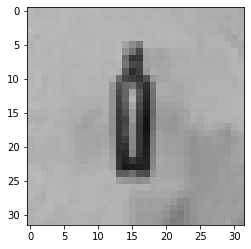

Actual class: 0
Predicted class: 0


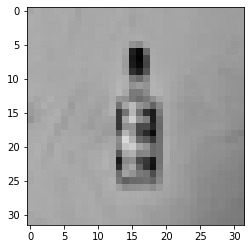

Actual class: 0
Predicted class: 0


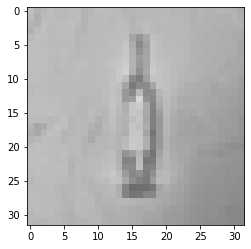

Actual class: 0
Predicted class: 0


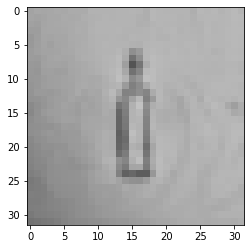

Actual class: 0
Predicted class: 0


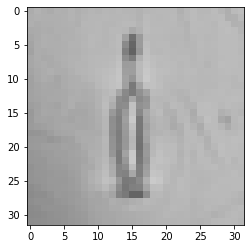

Actual class: 0
Predicted class: 0


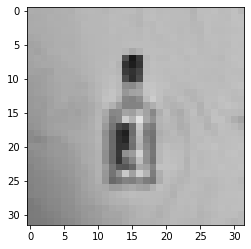

Actual class: 0
Predicted class: 0


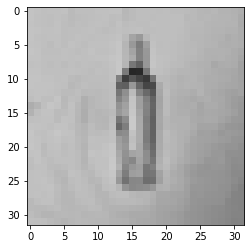

Actual class: 0
Predicted class: 0


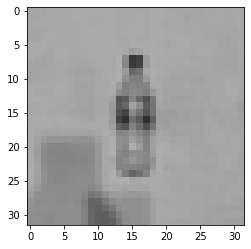

Actual class: 0
Predicted class: 0


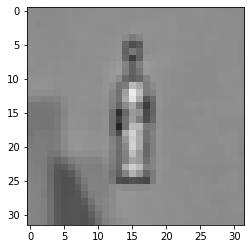

Actual class: 0
Predicted class: 0


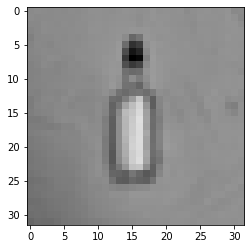

Actual class: 0
Predicted class: 0


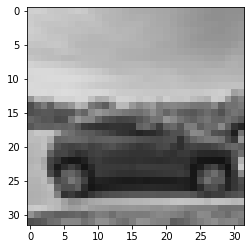

Actual class: 1
Predicted class: 1


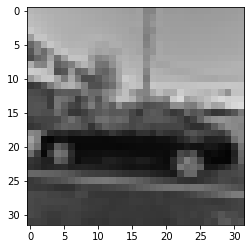

Actual class: 1
Predicted class: 1


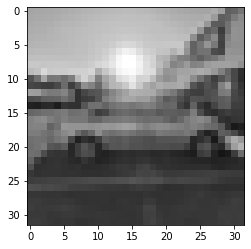

Actual class: 1
Predicted class: 1


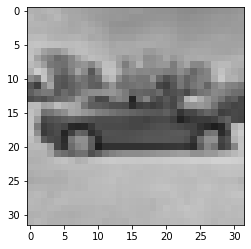

Actual class: 1
Predicted class: 1


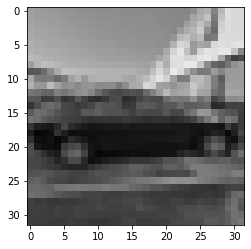

Actual class: 1
Predicted class: 1


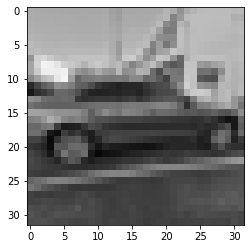

Actual class: 1
Predicted class: 1


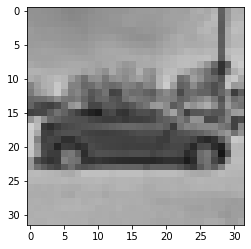

Actual class: 1
Predicted class: 1


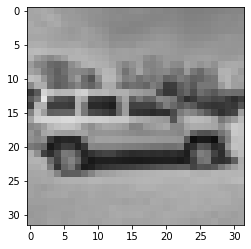

Actual class: 1
Predicted class: 1


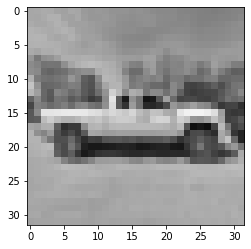

Actual class: 1
Predicted class: 1


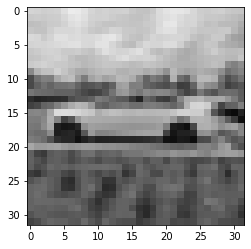

Actual class: 1
Predicted class: 1


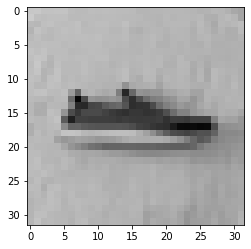

Actual class: 2
Predicted class: 2


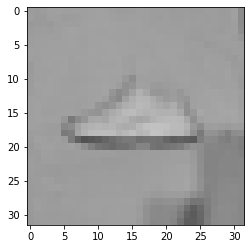

Actual class: 2
Predicted class: 2


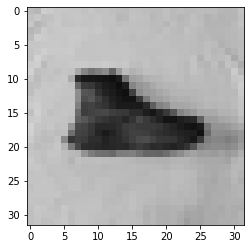

Actual class: 2
Predicted class: 2


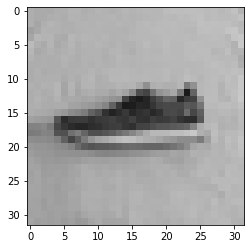

Actual class: 2
Predicted class: 2


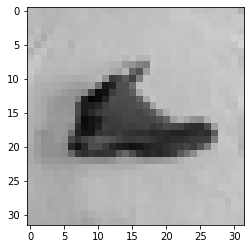

Actual class: 2
Predicted class: 2


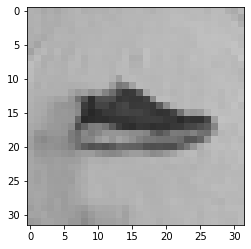

Actual class: 2
Predicted class: 2


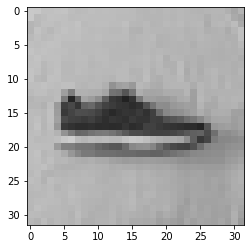

Actual class: 2
Predicted class: 2


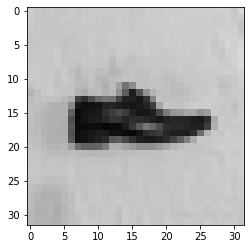

Actual class: 2
Predicted class: 2


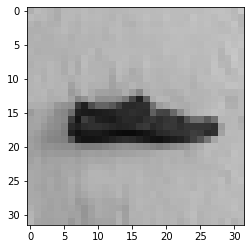

Actual class: 2
Predicted class: 2


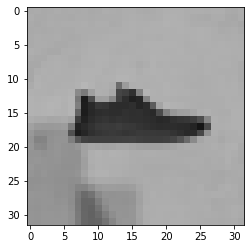

Actual class: 2
Predicted class: 2


In [20]:
for z in range(0,len(y_pred)):
    img_arr_temp = x_test[z]
    plt.imshow(img_arr_temp)
    plt.show()
    print("Actual class:", int(y_test_reshaped[z]))
    print("Predicted class:", np.argmax(y_pred[z]))

We use the VGG16 model as our pre-trained model. VGG16 is a convolutional neural network architecture designed for image classification tasks. The VGG16 network consists of 16 layers, including 13 convolutional layers and 3 fully connected layers.
The classification accuracies are given below:


| Data        | Accuracy    |
| ----------- | ----------- |
| Train       | 98.52%      |
| Val         | 100.00%     |
| Test        | 100.00%     |

We run the model for only 10 epochs, within which it produced great results. Val accuracy touches 100% after the first epoch itself. Train accuracy also goes high enough to 98.52%. We evaluate our trained model on the unseen test data, on which it also produces perfect accuracy of 100%. We have also displayed all the test images along with their predicted and actual class.

#### Train	 from	 scratch	 (without	 pretraining)	 a	 deep	 neural	 network	 that	 contains convolutional	layers	on	this	dataset	(the	one	you	created	in	part	c).	Report	classification	accuracy and	 give	 a	 few	 examples	 of	 correct/incorrect	 classification	 (show	 a	 few	 images	 that	 were	correctly/incorrectly	classified).	Note:	The	objective	of	this	question	is	to	illustrate	that	training	deep	networks	 from	 scratch	 requires	a	lot	 of	 data	 so	it	is	 ok	if	 your	 classification	accuracy	is	low.

In [21]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(540, 32, 32, 3)
(30, 32, 32, 3)
(30, 32, 32, 3)
(540, 1)
(30, 1)
(30, 1)


In [22]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(3, activation='softmax'))

In [23]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
17/17 [==============================] - 1s 23ms/step - loss: 24.1280 - accuracy: 0.4296 - val_loss: 0.3473 - val_accuracy: 0.9000
Epoch 2/10
17/17 [==============================] - 0s 17ms/step - loss: 0.2534 - accuracy: 0.9185 - val_loss: 0.1524 - val_accuracy: 0.9333
Epoch 3/10
17/17 [==============================] - 0s 17ms/step - loss: 0.0650 - accuracy: 0.9796 - val_loss: 0.0487 - val_accuracy: 0.9667
Epoch 4/10
17/17 [==============================] - 0s 18ms/step - loss: 0.0199 - accuracy: 0.9981 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 5/10
17/17 [==============================] - 0s 16ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 6/10
17/17 [==============================] - 0s 17ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 7/10
17/17 [==============================] - 0s 16ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 8/10
1

In [24]:
y_pred = cnn_model.predict(x_test)

1/1 [==============================] - 0s 70ms/step


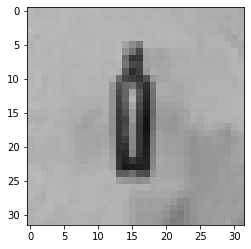

Actual class: 0
Predicted class: 0


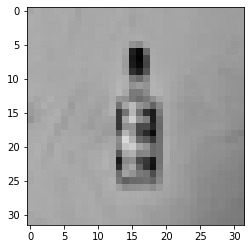

Actual class: 0
Predicted class: 0


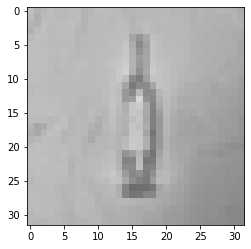

Actual class: 0
Predicted class: 0


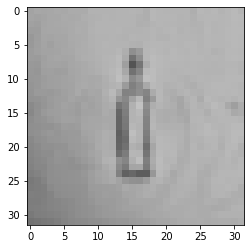

Actual class: 0
Predicted class: 0


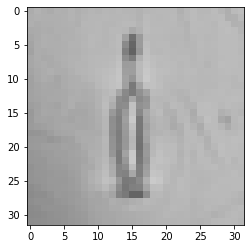

Actual class: 0
Predicted class: 0


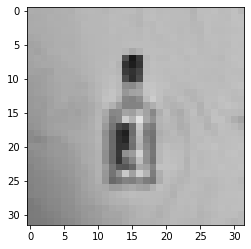

Actual class: 0
Predicted class: 0


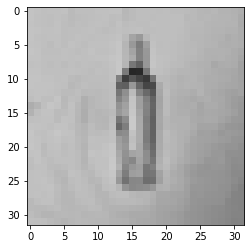

Actual class: 0
Predicted class: 0


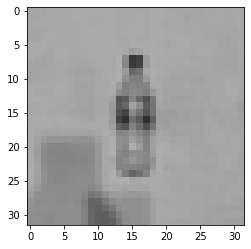

Actual class: 0
Predicted class: 0


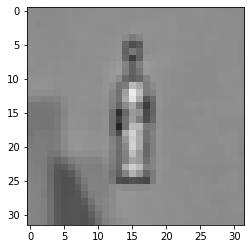

Actual class: 0
Predicted class: 0


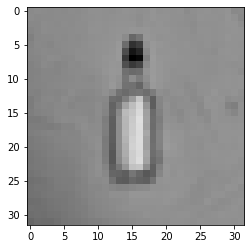

Actual class: 0
Predicted class: 0


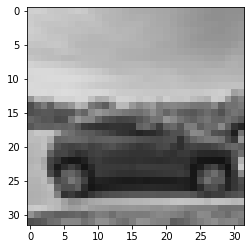

Actual class: 1
Predicted class: 1


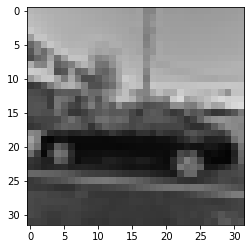

Actual class: 1
Predicted class: 1


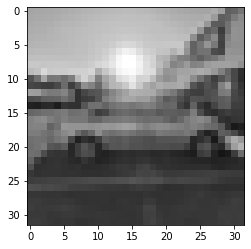

Actual class: 1
Predicted class: 1


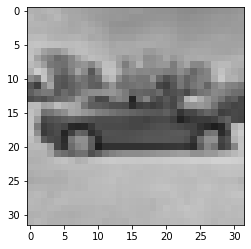

Actual class: 1
Predicted class: 1


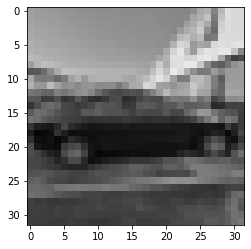

Actual class: 1
Predicted class: 1


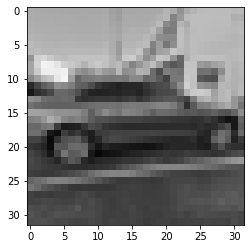

Actual class: 1
Predicted class: 1


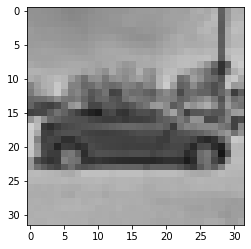

Actual class: 1
Predicted class: 1


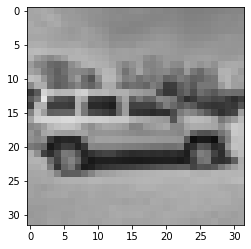

Actual class: 1
Predicted class: 1


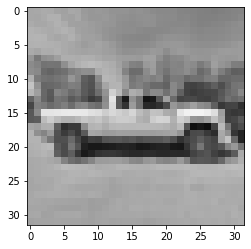

Actual class: 1
Predicted class: 1


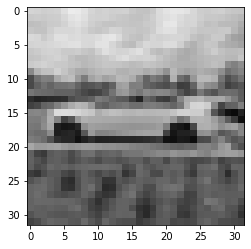

Actual class: 1
Predicted class: 1


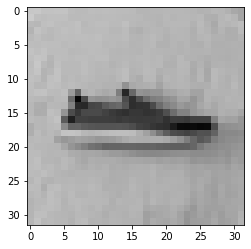

Actual class: 2
Predicted class: 2


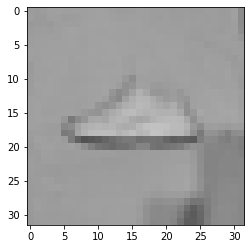

Actual class: 2
Predicted class: 2


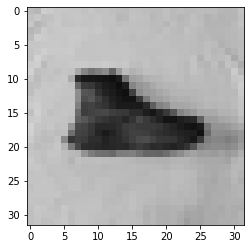

Actual class: 2
Predicted class: 2


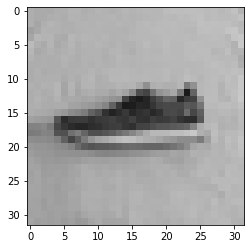

Actual class: 2
Predicted class: 2


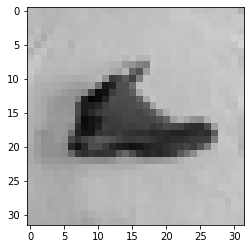

Actual class: 2
Predicted class: 2


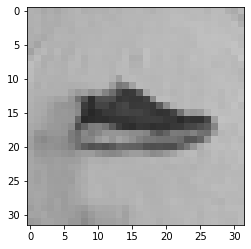

Actual class: 2
Predicted class: 2


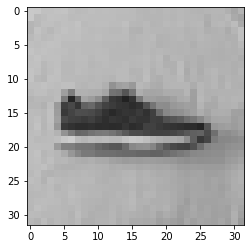

Actual class: 2
Predicted class: 2


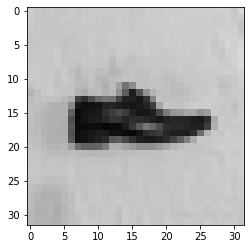

Actual class: 2
Predicted class: 2


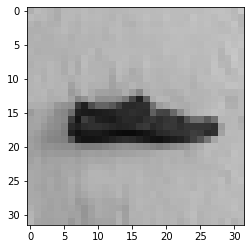

Actual class: 2
Predicted class: 2


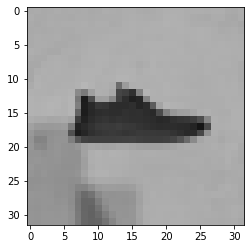

Actual class: 2
Predicted class: 2


In [26]:
for z in range(0,len(y_pred)):
    img_arr_temp = x_test[z]
    plt.imshow(img_arr_temp)
    plt.show()
    print("Actual class:", int(y_test_reshaped[z]))
    print("Predicted class:", np.argmax(y_pred[z]))

Our CNN model has the following structure. An input layer of shape 32x32x3, followed by 2 blocks of Conv2D + MaxPooling2D layers. The Conv2D layer uses ReLU activation function. The pooling layer works to reduce overfitting. It is followed by a Flatten layer, followed by 2 dense layers. The first dense layer has 64 neurons with ReLU activation function, and the second has 3 neurons (for 3 output classes) with softmax activation function. The softmax is a popular choice to use for the output layer since it uses probabilistic methods to determining the output class.
We also run this CNN model for 10 epochs, and it also produces excellent results on our dataset. The training accuracy starts off low but ultimately reaches 100%.

| Data        | Accuracy    |
| ----------- | ----------- |
| Train       | 100.00%     |
| Val         | 100.00%     |
| Test        | 100.00%     |